In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
import time
from src.data.dataset import Dataset
from src.preparation.text_processing import DataFrameTextProcessing
from src.visualization.visualization import Visualization

[nltk_data] Downloading package crubadan to
[nltk_data]     C:\Users\d4nie\AppData\Roaming\nltk_data...
[nltk_data]   Package crubadan is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\d4nie\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
TO_SAVE = True
TO_LOAD = True 
IS_DEBUG_1PCT = True
IS_DEBUG_10PCT = False

# Initial Exploration

In [3]:
reviews_dataset = Dataset.load_dataframe(file_name='reviews_by_course.csv', file_path='raw')
reviews_dataset.head(8)

,CourseId,Review,Label
0,2-speed-it,BOring,1
1,2-speed-it,Bravo !,5
2,2-speed-it,Very goo,5
3,2-speed-it,"Great course - I recommend it for all, especia...",5
4,2-speed-it,One of the most useful course on IT Management!,5
5,2-speed-it,I was disappointed because the name is mislead...,3
6,2-speed-it,Super content. I'll definitely re-do the course,5
7,2-speed-it,Etant contrôleur de gestion pour le départemen...,5


In [4]:
# posicao 7: texto com lingua francesa e inglesa
reviews_dataset.loc[7,'Review']

"Etant contrôleur de gestion pour le département IT (HQ + Locale), le cours est vraiment intéressant et de très bonne qualité.J'insiste que la qualité et le professionnalisme des professeurs.I'm a controller for an IT department, the courses is very good and very helpful for my job. I recommand you to follow the training."

# Filtering the dataset

In [5]:
reviews = reviews_dataset[['Review', 'Label']]
reviews.dropna()

,Review,Label
0,BOring,1
1,Bravo !,5
2,Very goo,5
3,"Great course - I recommend it for all, especia...",5
4,One of the most useful course on IT Management!,5
...,...,...
140315,Trendy topic with talks from expertises in the...,4
140316,"Wonderful! Simple and clear language, good ins...",5
140317,an interesting and fun course. thanks. dr quincy,5
140318,"very broad perspective, up to date information...",4


In [6]:
reviews.iloc[129]['Review']

'Great course! Thank you!'

In [7]:
reviews.dtypes

Review    object
Label      int64
dtype: object

In [8]:
reviews['Review'].astype('string')
reviews.dtypes

Review    object
Label      int64
dtype: object

## Sampling (when applicable)

In [9]:
if IS_DEBUG_1PCT:
    reviews = Dataset.sample_dataframe(reviews, 1)
elif IS_DEBUG_10PCT:
    reviews = Dataset.sample_dataframe(reviews, 10)

## Add Language Column

In [10]:
text_processor = DataFrameTextProcessing(language='english')

In [11]:
if TO_LOAD:
    try:
        reviews = Dataset.load_dataframe('Step1_AddLanguageColumn.pkl', file_path='final')
    except:
        reviews['Language'] = text_processor.predict_language(reviews, text_column='Review', measure_time=True)
        if TO_SAVE:
            Dataset.save_dataframe(reviews, 'Step1_AddLanguageColumn.pkl', file_path='intermediate')
else:
    reviews['Language'] = text_processor.predict_language(reviews, text_column='Review', measure_time=True)
    if TO_SAVE:
        Dataset.save_dataframe(reviews, 'Step1_AddLanguageColumn.pkl', file_path='intermediate')

In [12]:
reviews['Language'].astype('string')
reviews.describe(include = 'all')

,Review,Label,Language
count,1403,1403.000000,1403
unique,1353,NaN,47
top,Excellent,NaN,eng
freq,6,NaN,968
mean,NaN,4.638632,NaN
std,NaN,0.802895,NaN
min,NaN,1.000000,NaN
25%,NaN,5.000000,NaN
50%,NaN,5.000000,NaN
75%,NaN,5.000000,NaN


## Filtering by English Reviews

In [13]:
reviews = text_processor.filter_out_other_languages(reviews, 'Language')
reviews.describe(include = 'all')

,Review,Label,Language
count,968,968.000000,968
unique,950,NaN,1
top,Great,NaN,eng
freq,5,NaN,968
mean,NaN,4.602273,NaN
std,NaN,0.827322,NaN
min,NaN,1.000000,NaN
25%,NaN,4.000000,NaN
50%,NaN,5.000000,NaN
75%,NaN,5.000000,NaN


# Label Distribution

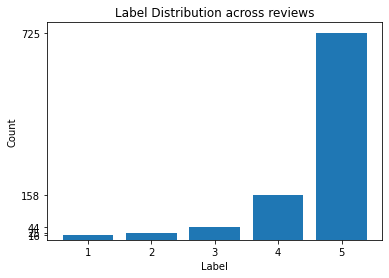

In [14]:
Visualization.plot_column_by_target(reviews, column='Review',target='Label')

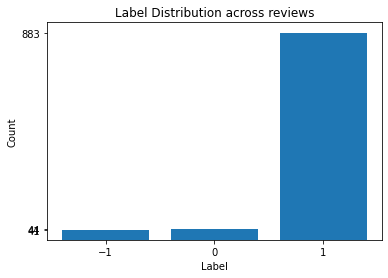

In [15]:
old_to_new_values = {1: -1, 2: -1, 3: 0, 4: 1, 5: 1}

def map_old_to_new_labels(value, old_to_new_values): 
    value = old_to_new_values[value]
    return value

reviews['TransformedLabel'] = reviews['Label'].map(old_to_new_values)
Visualization.plot_column_by_target(reviews, column='Review',target='TransformedLabel')

In [16]:
reviews['TransformedLabel'].describe()

count    968.000000
mean       0.869835
std        0.445127
min       -1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: TransformedLabel, dtype: float64

# Normalization

In [17]:
if TO_LOAD:
    try:
        reviews = Dataset.load_dataframe('Step2_NormalizeReviews.pkl', file_path='final')
    except:
        reviews['NormalizedReview'] = text_processor.normalize_df(reviews, 'Review')
        if TO_SAVE:
            Dataset.save_dataframe(reviews, 'Step2_NormalizeReviews.pkl', file_path='intermediate')
else:
    reviews['NormalizedReview'] = text_processor.normalize_df(reviews, 'Review')
    if TO_SAVE:
        Dataset.save_dataframe(reviews, 'Step2_NormalizeReviews.pkl', file_path='intermediate')

In [18]:
reviews = reviews[['NormalizedReview', 'TransformedLabel']]
reviews.head(5)

,NormalizedReview,TransformedLabel
80595,clear useful good choice new learner,1
68561,learn much great course highly recommend cours...,1
57935,genial curso aprendí varias cosas.soy usuario ...,1
104270,second week wietse tol simply brilliant learn ...,0
120800,enrol week ago find system kick course accompl...,-1


## Vectorization